This project is of multiclass classifiction in this we will use Data Digit library of sklearn dataset 
# We will use the following metrics to evaluate the model
# 1. Accuracy
# 2. Precision
# 3. Recall
# 4. F1-score
# We will use the following techniques to improve the model
# 1. Cross Validation
# We will use the following models
# 1. Logistic Regression
# 2. Decision Tree Classifier
# 3. Random Forest Classifier
# We will use the following libraries
# 1. Scikit-learn
# 2. Pandas
# 3. seaborn
# 4. matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Multi class using Logestic Regression

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data    
Y= digits.target    

# Standardization to make over data in in a specific range with avg of -1 to 1 and deviation of 1

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
print(X.shape)
print(Y.shape)


(1797, 64)
(1797,)


# Genrating random imges from the data set to check and validate data

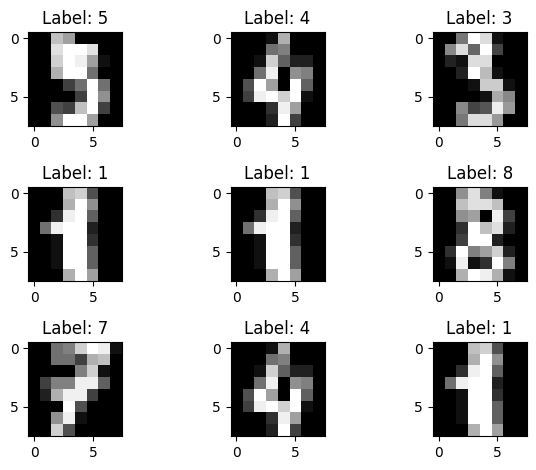

In [5]:
import random
for i in range(0,9):
    plt.subplot(3,3,i+1)
    random_num=(random.randrange(1,9))

    plt.imshow(digits.images[random_num], cmap='gray')
    plt.title(f"Label: {digits.target[random_num]}")
plt.tight_layout()
plt.show()

# Spliting the data according train and test size required 

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [7]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
y_pred=lr.predict(x_test)

In [9]:
data=pd.DataFrame({'actual':y_test,'predicted':y_pred})
print(data.head())

   actual  predicted
0       6          6
1       9          9
2       3          3
3       7          7
4       2          2


In [39]:
p=(accuracy_score(y_test,y_pred))
print("Accuracy:",p)

Accuracy: 0.9722222222222222


In [11]:
a=confusion_matrix(y_test,y_pred)
c=classification_report(y_test,y_pred)
print("Confusion Matrix: ", a)
print("Classification Report: ", c)

Confusion Matrix:  [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                  

#  Cross validation to check average score of our model at different data used for training

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(max_iter=1000), X, Y, cv=5)
print("CV Accuracy: ", scores.mean())

CV Accuracy:  0.9187774682760755


Text(0.5, 23.52222222222222, 'Ground Truth')

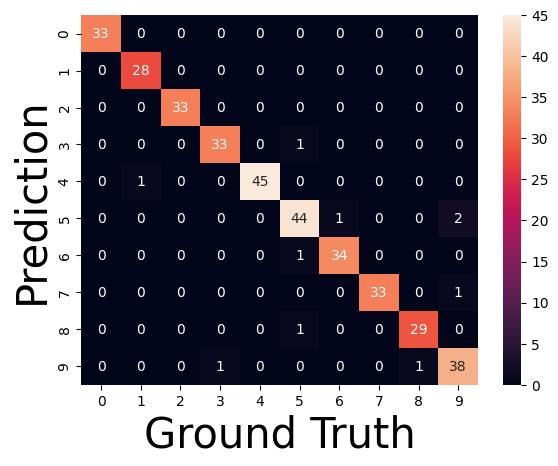

In [13]:
ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
ax.set_ylabel('Prediction', fontsize=30)
ax.set_xlabel('Ground Truth', fontsize=30)

# Decision tree 

In [14]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier(criterion='entropy',random_state=20)
model=decision_tree.fit(x_train, y_train)
y_pred_Decision=model.predict(x_test)

In [21]:
df=pd.DataFrame({'actual':y_test,'predicted':y_pred_Decision})
df.head()

,actual,predicted
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2


In [ ]:
accuracy_score_decision_tree=accuracy_score(y_test,y_pred_Decision)
confusion_matrix_decision_tree=confusion_matrix(y_test,y_pred_Decision)

In [23]:
print(accuracy_score_decision_tree)
print(confusion_matrix_decision_tree)

0.8888888888888888
[[30  0  0  0  1  0  0  1  0  1]
 [ 0 25  0  0  0  0  0  0  1  2]
 [ 0  2 25  1  1  0  0  2  2  0]
 [ 0  0  2 30  0  1  0  0  1  0]
 [ 0  1  0  0 42  0  1  1  0  1]
 [ 0  0  0  0  0 44  1  1  1  0]
 [ 0  1  0  0  0  0 33  0  0  1]
 [ 0  1  0  0  1  0  0 31  0  1]
 [ 0  0  2  1  0  2  0  0 25  0]
 [ 0  0  0  1  0  1  0  2  1 35]]


In [41]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':range(1,10),
 'criterion':['gini','entropy'],'random_state':range(1,50)}
gr=GridSearchCV(estimator=DecisionTreeClassifier(),
 param_grid=param_grid,scoring='accuracy',n_jobs=-1)
gr.fit(x_train,y_train)
# Print best parameters and model
print("Best Parameters:", gr.best_params_)
print("Best Estimator:", gr.best_estimator_)
print("Best Score:", gr.best_score_)

# Best model for prediction
best_model = gr.best_estimator_
print(best_model)

Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'random_state': 27}
Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=27)
Best Score: 0.8601456639566395
DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=27)


In [38]:
import pandas as pd

results = pd.DataFrame(gr.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)
print(results[['params', 'mean_test_score']])


                                      params  mean_test_score
0   {'criterion': 'entropy', 'max_depth': 7}         0.855256
1   {'criterion': 'entropy', 'max_depth': 9}         0.842746
2   {'criterion': 'entropy', 'max_depth': 8}         0.839271
3      {'criterion': 'gini', 'max_depth': 9}         0.831577
4      {'criterion': 'gini', 'max_depth': 8}         0.826708
5   {'criterion': 'entropy', 'max_depth': 6}         0.826060
6      {'criterion': 'gini', 'max_depth': 7}         0.803037
7   {'criterion': 'entropy', 'max_depth': 5}         0.793368
8      {'criterion': 'gini', 'max_depth': 6}         0.749446
9   {'criterion': 'entropy', 'max_depth': 4}         0.700786
10     {'criterion': 'gini', 'max_depth': 5}         0.649247
11     {'criterion': 'gini', 'max_depth': 4}         0.549731
12  {'criterion': 'entropy', 'max_depth': 3}         0.530960
13     {'criterion': 'gini', 'max_depth': 3}         0.468314
14  {'criterion': 'entropy', 'max_depth': 2}         0.332615
15     {

# random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
random_tree=RandomForestClassifier(random_state=42,max_depth=10)
random_tree.fit(x_train,y_train)
y_pred_random=random_tree.predict(x_test)
df=pd.DataFrame({'actual':y_test,'predicted':y_pred_random})
df.head()
random_accuracy=accuracy_score(y_test,y_pred)
random_confusion=confusion_matrix(y_test,y_pred)
print(random_accuracy)
print(random_confusion)

0.9722222222222222
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 44  1  0  0  2]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


# Visual representation of our model accuracy

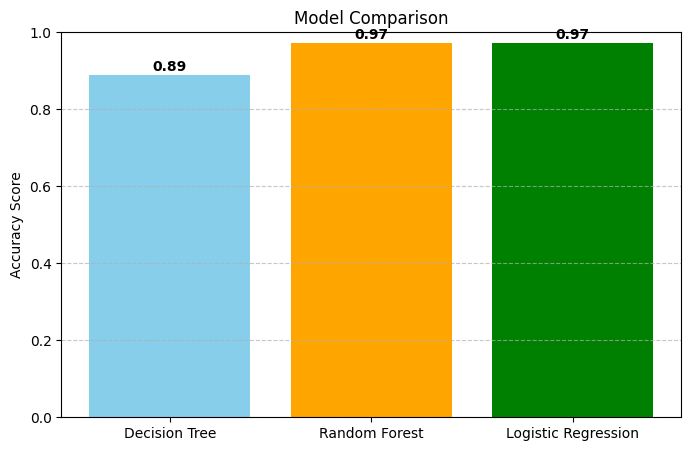

In [43]:
import matplotlib.pyplot as plt
models = ['Decision Tree', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_score_decision_tree,random_accuracy,p]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add score text on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()


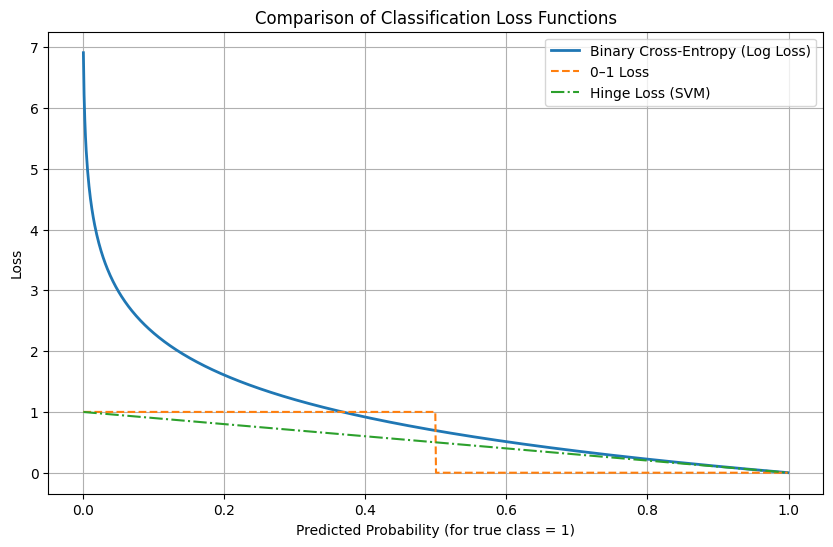

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.001, 0.999, 1000)  # predicted probabilities

# Assume true label y = 1
log_loss = -np.log(x)
zero_one_loss = np.where(x >= 0.5, 0, 1)
hinge_loss = np.maximum(0, 1 - x)

plt.figure(figsize=(10, 6))
plt.plot(x, log_loss, label='Binary Cross-Entropy (Log Loss)', linewidth=2)
plt.plot(x, zero_one_loss, label='0–1 Loss', linestyle='--')
plt.plot(x, hinge_loss, label='Hinge Loss (SVM)', linestyle='-.')
plt.xlabel('Predicted Probability (for true class = 1)')
plt.ylabel('Loss')
plt.title('Comparison of Classification Loss Functions')
plt.legend()
plt.grid(True)
plt.show()